# Decision Tree Examples

+ Using the Iris dataset
+ Using graphviz for visualization of the tree

### Graphviz installation
1. Download and install from [graphviz site](https://graphviz.gitlab.io/download)
2. Put the executable on the system path
3. Install the python package using command  
   `conda install -c conda-forge python-graphviz`

### Packages

In [3]:
%matplotlib inline
# data and plotting packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# modeling packages
import scipy.stats as stats
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
import mlutils
from mlutils import plot_decision_boundary, plot_regression

### Display Settings

In [4]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

### Data Loading

In [5]:
# load the iris dataset from sklearn; note sklearn does not use pandas dataframes
iris = load_iris()
# anatomy of the data object
print("feature_names: {}".format(iris.feature_names))
print("feature_shape: {}".format(iris.data.shape))
print("target_names: {}".format(iris.target_names))
print("target_shape: {}".format(iris.target.shape))
#print(iris.DESCR)

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
feature_shape: (150, 4)
target_names: ['setosa' 'versicolor' 'virginica']
target_shape: (150,)


### Decision Tree Classification

We fit a Decision Tree classifier model using only two attributes.

In [6]:
# Pick the indices of two features and two classes
feat0_idx = 2
feat1_idx = 3

X = iris.data[:, (feat0_idx, feat1_idx)]                    # choose the features here
y = iris.target                       

# Create an instance of DecisionTreeClassifier and fit the data.
# Switch off the C hyperparameter
dtree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=2)
print(dtree)
dtree.fit(X, y)

y_fit = dtree.predict(X)
n_fail = (y != y_fit).sum()
print("Total points: {0}; Mislabeled points: {1}\n".format(len(y), n_fail))

# export tree graph
fbasename = 'iris-dtree'
export_graphviz(dtree, out_file=fbasename + '.dot', 
                feature_names=[iris.feature_names[i] for i in [feat0_idx, feat1_idx]], 
                class_names=iris.target_names, filled=True)

# render the graph (requires graphviz exeecutable on the path)
cmd = 'dot -Tpng ' + fbasename + '.dot -o ' + fbasename + '.png'
os.system(cmd);

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')
Total points: 150; Mislabeled points: 6



### Visualize the tree

![iris decision tree](iris-dtree.png)

### Decision Boundaries


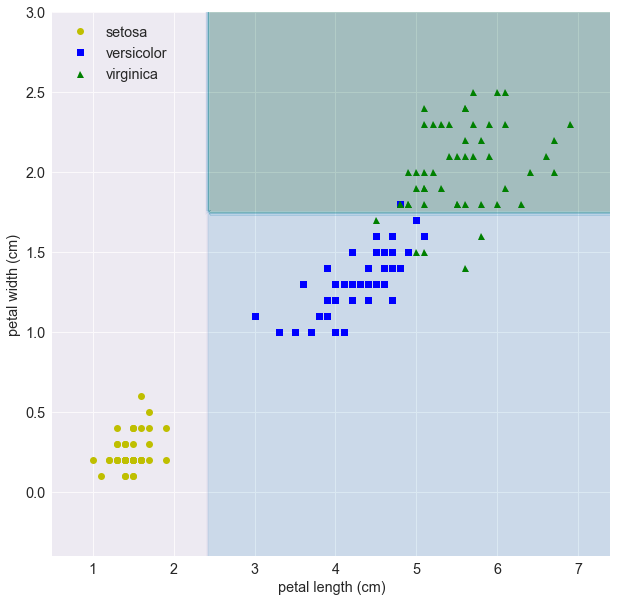

In [7]:
# axes limits for plotting
xlim = [min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5]
ylim = [min(X[:, 1]) - 0.5, max(X[:, 1]) + 0.5]
axlim = xlim + ylim

# create a plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plot_decision_boundary(dtree, ax, axlim)
# plot the observations
ax.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label=iris.target_names[0])
ax.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label=iris.target_names[1])
ax.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label=iris.target_names[2])
ax.set(xlabel=iris.feature_names[feat0_idx], ylabel=iris.feature_names[feat1_idx])
ax.legend(loc='upper left')

Prediction probabilities are estimated empirically

In [8]:
x_in = [3.2, 1.7]                # a new observation
y_pred = dtree.predict([x_in])
p_pred = dtree.predict_proba([x_in])
print('Prediction: {}'.format(iris.target_names[y_pred][0]))
print('Probabilities:')
for species, prob in zip(iris.target_names, np.round(p_pred, 3).tolist()[-1]):
    print('{0:10s}: {1:5.3f}'.format(species, prob))

Prediction: versicolor
Probabilities:
setosa    : 0.000
versicolor: 0.907
virginica : 0.093


### Instability
Suppose we remove one point, the versicolor with the highest petal width.  
We refit the tree and plot the decision boundary.

In [9]:
rem_feat = 1
rem_species = 1

# the maximum rem_feat for rem_species
max_feat = X[:, rem_feat][y == rem_species].max()
keep_idx = (X[:, rem_feat] != max_feat) | (y != rem_species)
# remove the row for rem_species that has the maximum rem_feat
X_mod = X[keep_idx].copy()
y_mod = y[keep_idx].copy()
# fit a tree with one row removed
dmodtree = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)
dmodtree.fit(X_mod, y_mod)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

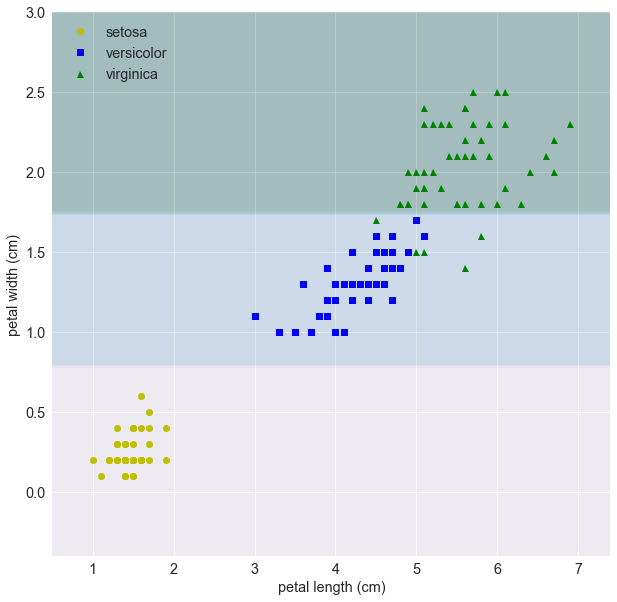

In [10]:
# create a plot
fig1 = plt.figure(figsize=(10, 10))
ax1 = fig1.add_subplot(111)
plot_decision_boundary(dmodtree, ax1, axlim)
# plot the observations
ax1.plot(X_mod[:, 0][y_mod==0], X_mod[:, 1][y_mod==0], "yo", label=iris.target_names[0])
ax1.plot(X_mod[:, 0][y_mod==1], X_mod[:, 1][y_mod==1], "bs", label=iris.target_names[1])
ax1.plot(X_mod[:, 0][y_mod==2], X_mod[:, 1][y_mod==2], "g^", label=iris.target_names[2])
ax1.set(xlabel=iris.feature_names[feat0_idx], ylabel=iris.feature_names[feat1_idx])
ax1.legend(loc='upper left')

### Decision Tree Regression

Using synthetic data.  
We generate quadratic data and fit two regression trees with different depths.

In [11]:
np.random.seed(0)  # fix the seed for reproducibily
n_samples = 1000   # total number of samples
sigma = 0.1        # noise volatility

XX = np.random.rand(n_samples, 1)  # from uniform [0, 1] distrobution
yy = 4 * (XX - 0.5) ** 2
yy = yy + sigma * np.random.randn(n_samples, 1)

max_depth1 = 2
regtree1 = DecisionTreeRegressor(max_depth=max_depth1, random_state=42)
regtree1.fit(XX, yy)
max_depth2 = 4
regtree2 = DecisionTreeRegressor(max_depth=max_depth2, random_state=42)
regtree2.fit(XX, yy);

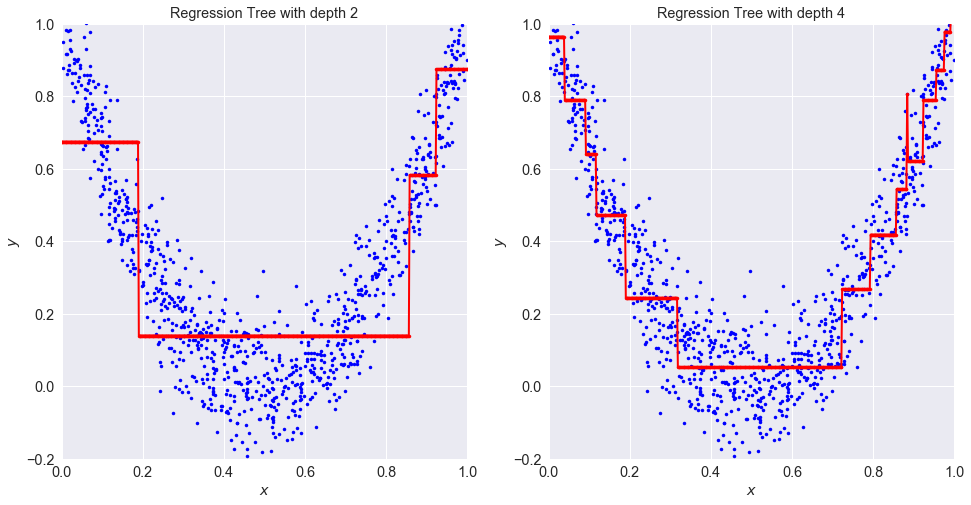

In [12]:
# Display results
fig2 = plt.figure(figsize=(16, 8))
ax2 = fig2.add_subplot(121)
ax3 = fig2.add_subplot(122)

plot_regression(regtree1, XX, yy, ax2,  [0, 1, -0.2, 1])
plot_regression(regtree2, XX, yy, ax3,  [0, 1, -0.2, 1])

ax2.set(xlabel='$x$', ylabel='$y$')
ax2.set(title='Regression Tree with depth ' + str(max_depth1))

ax3.set(xlabel='$x$', ylabel='$y$')
ax3.set(title='Regression Tree with depth ' + str(max_depth2));